# Analysis of lift and drag coefficients

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from utils import fetch_force_coefficients, interpolate_uniform_1D
from glob import glob
from scipy.ndimage import gaussian_filter1d

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

run = "/media/andre/ElementsSE/naca0012_shock_buffet/run/"
output = "./output/"
!mkdir -p output

print("Matplolib version: ", mpl.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.3.3
Numpy version:  1.19.5


## Raw lift and drag data
### Pre-onset conditions, $\alpha = 2$
#### Wall functions

In [2]:
cases = glob(run + "set1_alpha2_iddes_spalding*")
cases = [case.split("/")[-1] for case in cases]

In [3]:
Ma = 0.75
U_inf = 255.22
a_inf = U_inf / Ma
chord = 0.6010500

Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g2500_t2.5/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref1/postProcessing/forces/
Found 3 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref1_3D_d20/postProcessing/forces/
Found 4 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref1_3D_d40/postProcessing/forces/
Found 4 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref1_3D_d60/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref1_3D_half_d30/postProce

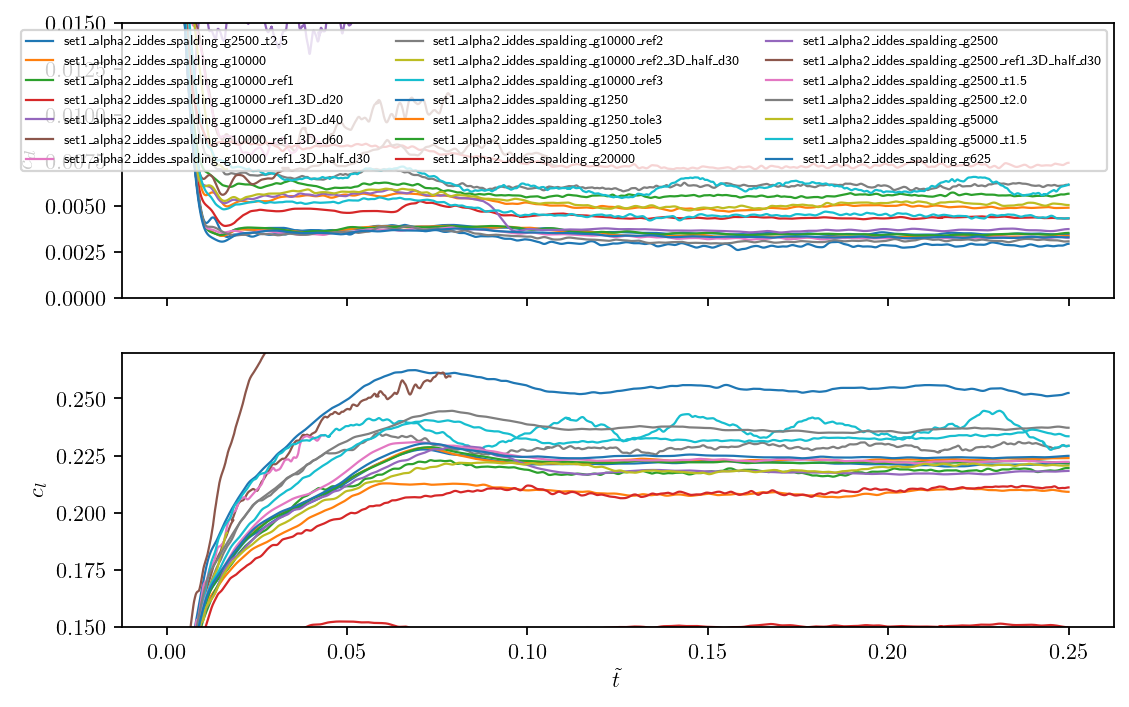

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
sigma = 100
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    tt = t * a_inf / chord
    ax1.plot(t[::every], gaussian_filter1d(cd[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], gaussian_filter1d(cl[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax1.set_ylim(0, 0.015)
ax2.set_ylabel(r"$c_l$")
ax2.set_ylim(0.15, 0.27)
ax2.set_xlabel(r"$\tilde{t}$")
plt.show()

#### Default interpolation

In [5]:
cases = glob(run + "set1_alpha2_iddes_g*")
cases = [case.split("/")[-1] for case in cases]

Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g2500/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1/postProcessing/forces/
Found 3 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1_3D_half_d30/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1_linearUpwind/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1_MUSCL/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1_vanLeer/postProcessing/forces/
Found 3 time folders in path /media/andre/Elemen

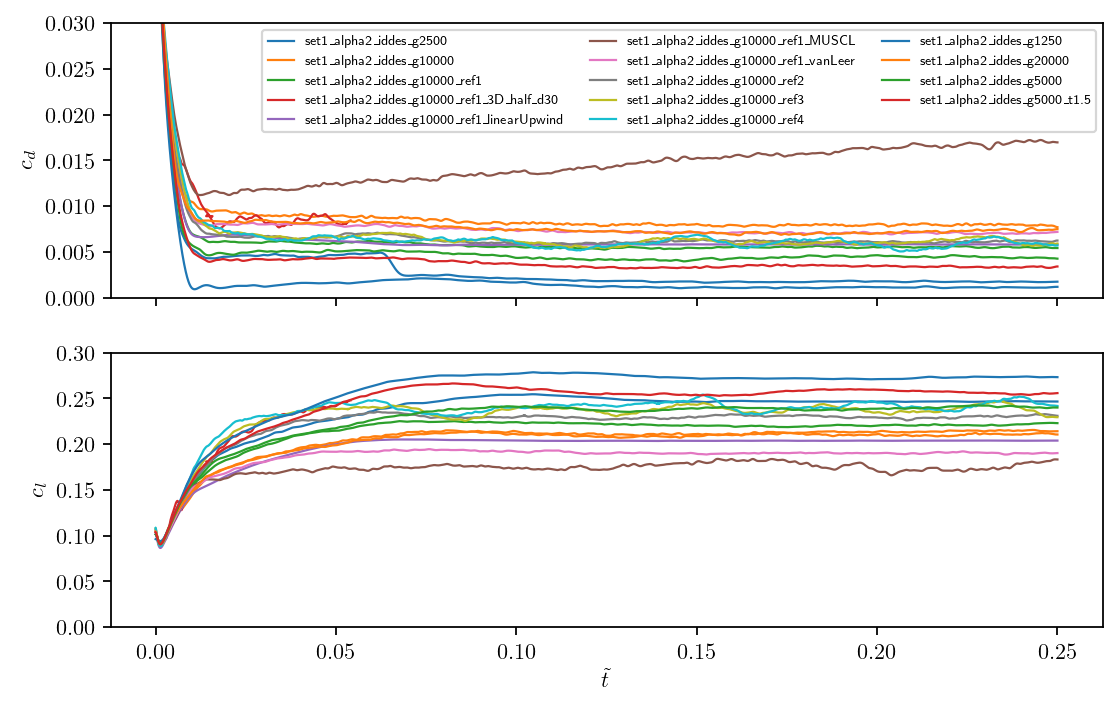

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
sigma = 100
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    tt = t * a_inf / chord
    ax1.plot(t[::every], gaussian_filter1d(cd[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], gaussian_filter1d(cl[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax1.set_ylim(0, 0.030)
ax2.set_ylabel(r"$c_l$")
ax2.set_ylim(0, 0.30)
ax2.set_xlabel(r"$\tilde{t}$")
plt.show()

#### Turbulence modeling

In [7]:
cases = glob(run + "set1_alpha2_*_g10000_ref3")
cases = [case.split("/")[-1] for case in cases]

Found 4 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref3/postProcessing/forces/
Found 4 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref3/postProcessing/forces/
Found 3 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_ko_g10000_ref3/postProcessing/forces/
Found 3 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_sa_g10000_ref3/postProcessing/forces/


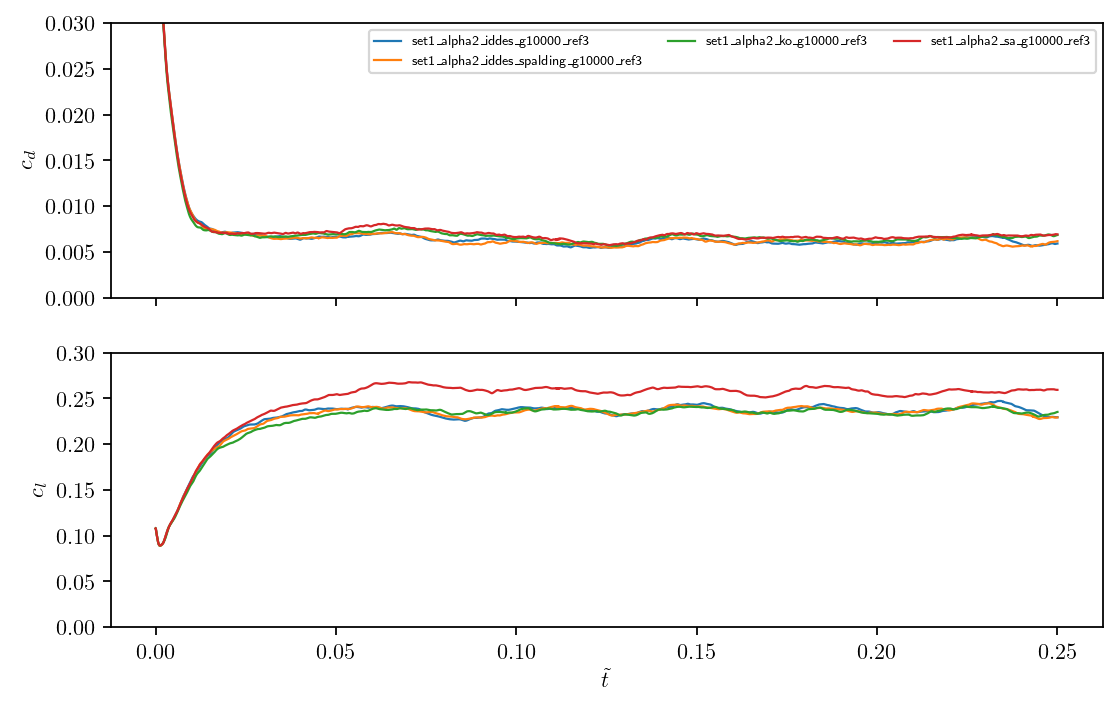

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
sigma = 100
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    tt = t * a_inf / chord
    ax1.plot(t[::every], gaussian_filter1d(cd[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], gaussian_filter1d(cl[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax1.set_ylim(0, 0.030)
ax2.set_ylabel(r"$c_l$")
ax2.set_ylim(0, 0.30)
ax2.set_xlabel(r"$\tilde{t}$")
plt.show()

### Buffet conditions, $\alpha = 4$
#### Wall functions

In [5]:
cases = glob(run + "set1_alpha4_iddes_spalding*3D*")
cases = [case.split("/")[-1] for case in cases]

Found 7 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g10000_ref1_3D_d20/postProcessing/forces/
Found 8 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g10000_ref1_3D_d40/postProcessing/forces/
Found 14 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g10000_ref1_3D_d60/postProcessing/forces/
Found 10 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g10000_ref1_3D_half_d30/postProcessing/forces/
Found 6 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g2500_ref1_3D_half_d30/postProcessing/forces/


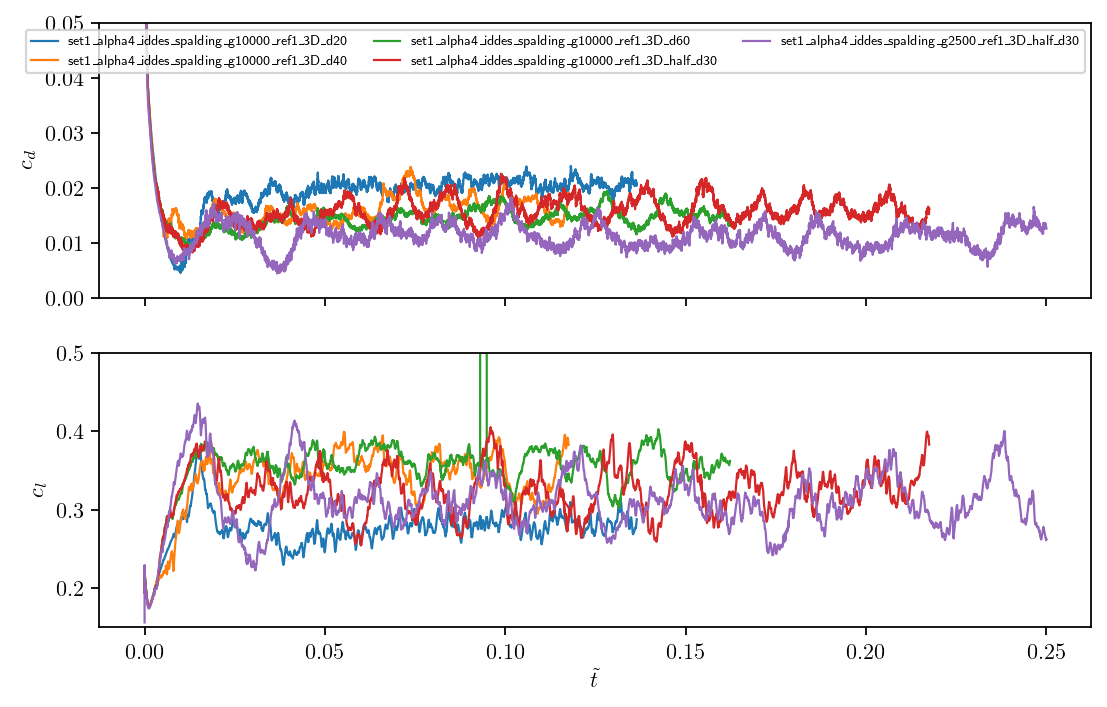

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
sigma = 1
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    tt = t * a_inf / chord
    ax1.plot(t[::every], gaussian_filter1d(cd[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], gaussian_filter1d(cl[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax1.set_ylim(0, 0.05)
ax2.set_ylabel(r"$c_l$")
ax2.set_ylim(0.15, 0.50)
ax2.set_xlabel(r"$\tilde{t}$")
plt.show()

#### Default interpolation

In [7]:
cases = glob(run + "set1_alpha4_iddes_g10000_ref1*")
cases = [case.split("/")[-1] for case in cases]

Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_g10000_ref1/postProcessing/forces/
Found 9 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_g10000_ref1_3D_half_d30/postProcessing/forces/


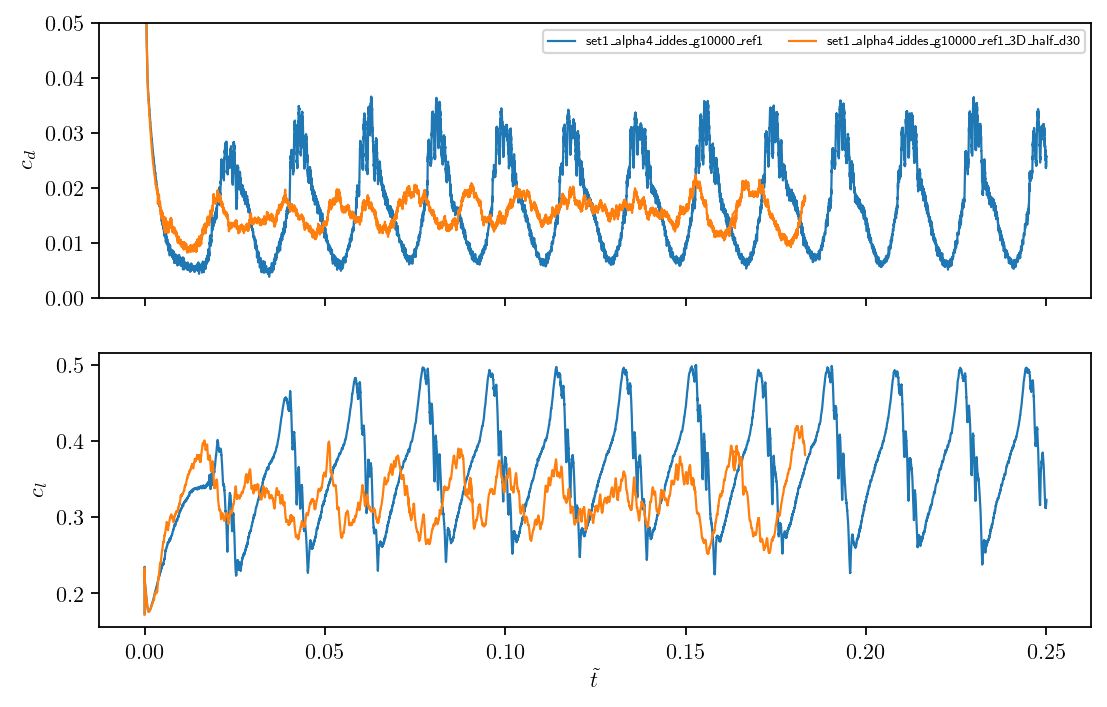

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
sigma = 1
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    tt = t * a_inf / chord
    ax1.plot(t[::every], gaussian_filter1d(cd[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], cl[::every], c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax1.set_ylim(0, 0.05)
ax2.set_ylabel(r"$c_l$")
#ax2.set_ylim(0.15, 0.30)
ax2.set_xlabel(r"$\tilde{t}$")
plt.show()

#### Turbulence modeling

In [13]:
cases = glob(run + "set1_alpha4_*_g10000_ref3")
cases = [case.split("/")[-1] for case in cases]

Found 6 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_g10000_ref3/postProcessing/forces/
Found 2 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_ko_g10000_ref3/postProcessing/forces/
Found 2 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_sa_g10000_ref3/postProcessing/forces/


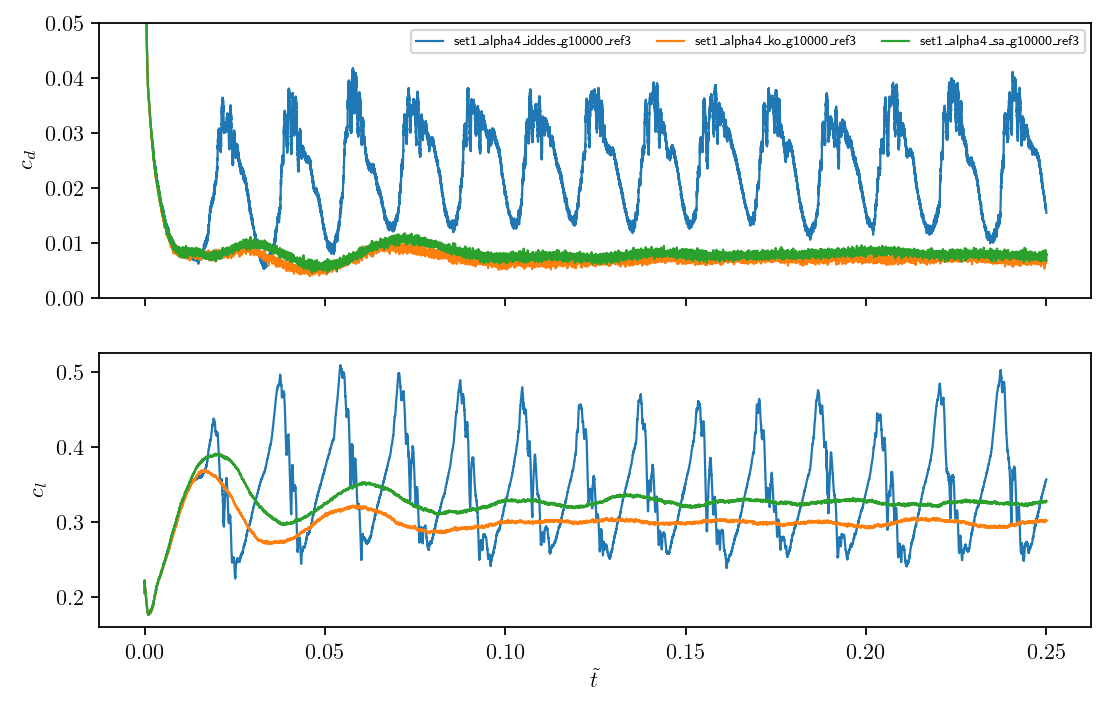

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
sigma = 1
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    tt = t * a_inf / chord
    ax1.plot(t[::every], gaussian_filter1d(cd[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], gaussian_filter1d(cl[::every], sigma=sigma, axis=0), c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax1.set_ylim(0, 0.05)
ax2.set_ylabel(r"$c_l$")
#ax2.set_ylim(0.15, 0.30)
ax2.set_xlabel(r"$\tilde{t}$")
plt.show()

## Mean and standard deviation of lift and drag, $\alpha = 2$
### Refinement, with and without wall function

In [15]:
default = ["set1_alpha2_iddes_g10000{:s}".format(s) for s in ["", "_ref1", "_ref2", "_ref3"]]
wallf = ["set1_alpha2_iddes_spalding_g10000{:s}".format(s) for s in ["", "_ref1", "_ref2", "_ref3"]]
wallf_g2500 = ["set1_alpha2_iddes_spalding_g2500{:s}".format(s) for s in ["", "_t1.5", "_t2.0", "_t2.5"]]

In [16]:
t_start = 0.15

mean_cd_df = []
mean_cl_df = []
mean_cd_wf = []
mean_cl_wf = []
mean_cd_wf_g25 = []
mean_cl_wf_g25 = []

for case in default:
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    start_idx = np.argmin(np.absolute(t - t_start))
    mean_cd_df.append(np.mean(cd[start_idx:]))
    mean_cl_df.append(np.mean(cl[start_idx:]))
for case in wallf:
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    start_idx = np.argmin(np.absolute(t - t_start))
    mean_cd_wf.append(np.mean(cd[start_idx:]))
    mean_cl_wf.append(np.mean(cl[start_idx:]))
for case in wallf_g2500:
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    start_idx = np.argmin(np.absolute(t - t_start))
    mean_cd_wf_g25.append(np.mean(cd[start_idx:]))
    mean_cl_wf_g25.append(np.mean(cl[start_idx:]))

Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref1/postProcessing/forces/
Found 3 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref2/postProcessing/forces/
Found 4 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_g10000_ref3/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000/postProcessing/forces/
Found 1 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref1/postProcessing/forces/
Found 3 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha2_iddes_spalding_g10000_ref2/postProcessing/forces/
Found 4 time folders in path /media/andre/ElementsSE/naca00

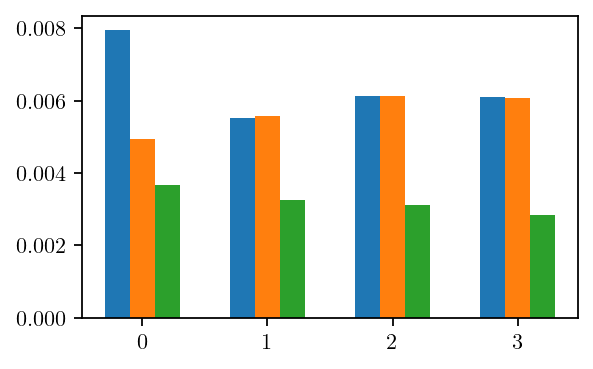

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))

x = np.arange(len(mean_cd_df))
width = 0.2
ax.bar(x-width, mean_cd_df, width)
ax.bar(x, mean_cd_wf, width)
ax.bar(x+width, mean_cd_wf_g25, width)

plt.show()

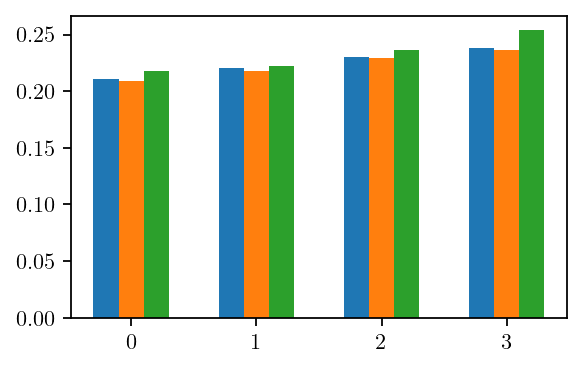

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))

x = np.arange(len(mean_cl_df))
width = 0.2
ax.bar(x-width, mean_cl_df, width)
ax.bar(x, mean_cl_wf, width)
ax.bar(x+width, mean_cl_wf_g25, width)

plt.show()

## Spectral analysis for cases with buffet, $\alpha = 4$

In [4]:
from scipy.signal import welch

case = run + "set1_alpha4_iddes_spalding_g2500_ref1_3D_half_d30/postProcessing/forces/"
t, cd, cl = fetch_force_coefficients(case)
f_s = 1000
n_samples = int(0.25*f_s)
t_uni, cl_uni = interpolate_uniform_1D(t[::100], cl[::100], n_samples)
cl_uni = cl_uni - np.mean(cl_uni[50:])

Found 6 time folders in path /media/andre/ElementsSE/naca0012_shock_buffet/run/set1_alpha4_iddes_spalding_g2500_ref1_3D_half_d30/postProcessing/forces/


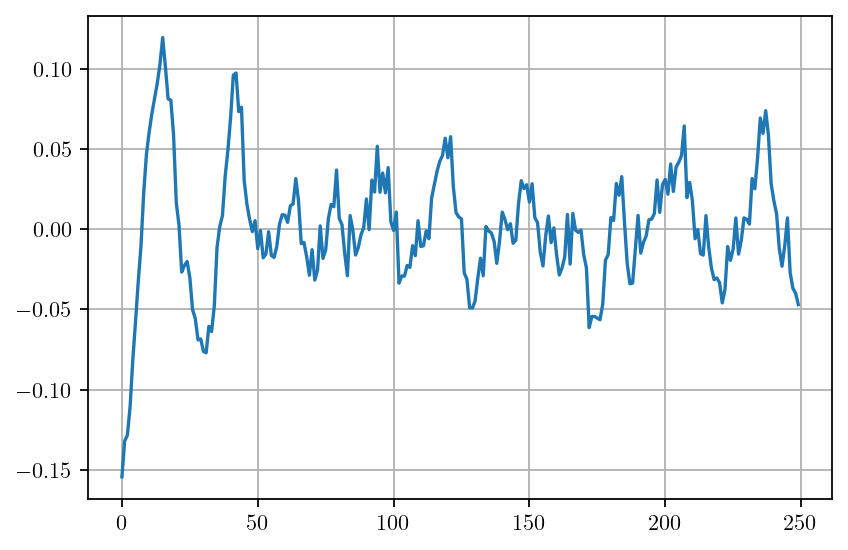

In [5]:
plt.plot(range(n_samples), cl_uni)
plt.grid()

0.5918828506982666 40.0
0.66586820703555 45.0


/home/andre/.local/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 250 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


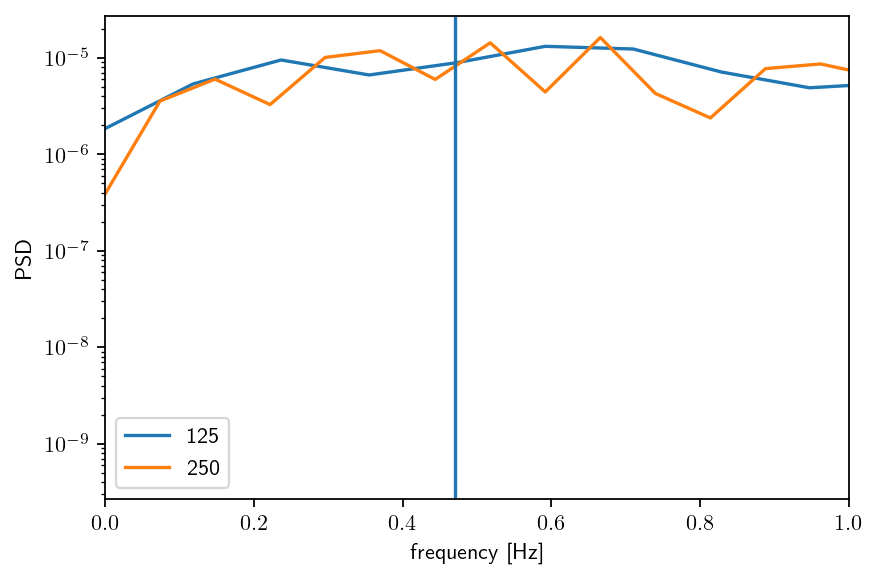

In [6]:
start_at = 50
for nseg in [125, 250]:
    f, Pxx_den = welch(cl_uni.squeeze()[start_at:], f_s, nperseg=nseg)
    #f, Pxx_den = welch(cl_uni.squeeze()[1500:], f_s)
    plt.semilogy(f*2*np.pi*chord/U_inf, Pxx_den, label=str(nseg))
    print(f[np.argmax(Pxx_den)]*2*np.pi*chord/U_inf, f[np.argmax(Pxx_den)])
plt.xlim([0, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.axvline(0.47)
plt.legend()

In [7]:
T = np.max(t)
print(T)
dt = T / n_samples
print(dt)
df = 1/T
print(df)
dw = 2.0*np.pi/T
print(dw)
print(dw*n_samples/2)

0.25
0.001
4.0
25.132741228718345
3141.592653589793


In [16]:
start_at = 50
#win = np.kaiser(len(cl_uni.squeeze()[start_at:]), 5)
#X = np.fft.fft(cl_uni.squeeze()[start_at:]*win, n=8000)
X = np.fft.fft(cl_uni.squeeze()[start_at:], 800)
print(X.shape)
#f_fft = np.fft.fftfreq(X.shape[0])*X.shape[0]*df
df = 1/(4*T)
f_fft = np.fft.fftfreq(800)*800*df
print(f_fft[:20])

(800,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


(800,)
28.000000000000004
0.4143179954887867
31.763042260509707


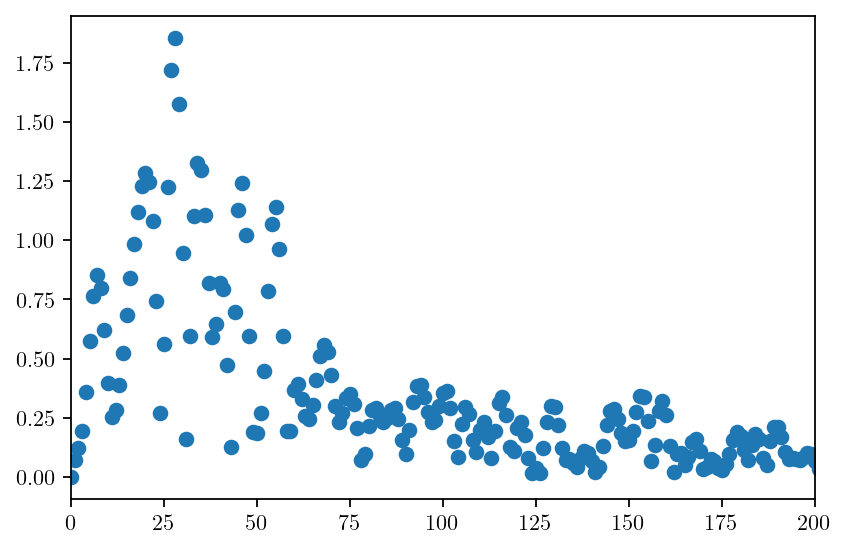

In [17]:
plt.scatter(f_fft, np.absolute(X))
plt.xlim(0, 200)
#plt.ylim(0, 100)
print(X.shape)
f_max = f_fft[np.argmax(np.where(f_fft > 0, np.absolute(X), 0))]
print(f_max)
print(f_max*2*np.pi*chord/U_inf)
f_exp = 0.47/(2*np.pi*chord/U_inf)
print(0.47/(2*np.pi*chord/U_inf))